<a href="https://colab.research.google.com/github/catmasteryip/Deep-Learning/blob/master/RNN_NYC_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
jimport torch 
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [0]:
pwd

'/content'

In [0]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/Alcohol_Sales.csv',index_col=0,parse_dates=True)

In [0]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [0]:
len(df)

325

In [0]:
df = df.dropna()

In [0]:
len(df)

325

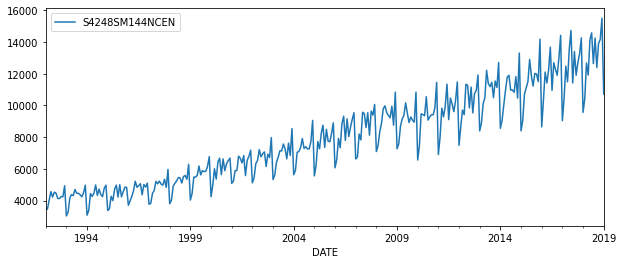

In [0]:
df.plot(figsize=(10,4))

In [0]:
df.columns

Index(['S4248SM144NCEN'], dtype='object')

In [0]:
y = df['S4248SM144NCEN'].values.astype(float)

In [0]:
test_size = 12

In [0]:
train_set = y[:-test_size]
test_set = y[-test_size:]


In [0]:
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [0]:
scaler.fit(train_set.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(-1, 1))

In [0]:
train_norm = scaler.transform(train_set.reshape(-1,1))

In [0]:
#train_norm

In [0]:
#training size: len(y)-test_size-window_size

In [0]:
train_norm = torch.FloatTensor(train_norm).view(-1)

In [0]:
train_norm.shape

torch.Size([313])

In [0]:
window_size = 12

In [0]:
def input_data(seq,ws):
  out = []
  L = len(seq)
  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    out.append((window,label))
  return out

In [0]:
train_data = input_data(train_norm,window_size)

In [0]:
len(train_data)

301

In [0]:
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]), tensor([-1.]))

In [0]:
class LSTMnetwork(nn.Module):
  def __init__(self,input_size=1,hidden_size=100,output_size=1):
    super().__init__()
    self.hidden_size = hidden_size
    self.lstm = nn.LSTM(input_size,hidden_size)
    self.linear = nn.Linear(hidden_size,output_size)
    self.hidden = (torch.zeros(1,1,self.hidden_size),
                   torch.zeros(1,1,self.hidden_size))
  def forward(self,seq):
    lstm_out,self.hidden = self.lstm(
        seq.view(len(seq),1,-1),self.hidden
    )
    pred = self.linear(lstm_out.view(len(seq),-1))
    return pred[-1]

In [0]:
torch.manual_seed(101)
model = LSTMnetwork()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [0]:
model

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [0]:
epochs = 100
import time
start_time = time.time()
for epoch in range(epochs):
  for seq, y_train in train_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size),
                   torch.zeros(1,1,model.hidden_size))
    y_pred = model(seq)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch} Loss {loss.item()}')
total_time = time.time()-start_time
print(total_time/60)

Epoch 0 Loss 0.2531020939350128
Epoch 1 Loss 0.3753201961517334
Epoch 2 Loss 0.390271931886673
Epoch 3 Loss 0.34934717416763306
Epoch 4 Loss 0.33085644245147705
Epoch 5 Loss 0.33229973912239075
Epoch 6 Loss 0.3267035484313965
Epoch 7 Loss 0.32074135541915894
Epoch 8 Loss 0.3065353333950043
Epoch 9 Loss 0.29518043994903564
Epoch 10 Loss 0.2693434953689575
Epoch 11 Loss 0.259985089302063
Epoch 12 Loss 0.24665780365467072
Epoch 13 Loss 0.22403952479362488
Epoch 14 Loss 0.1860266476869583
Epoch 15 Loss 0.1856127232313156
Epoch 16 Loss 0.17209510505199432
Epoch 17 Loss 0.25163033604621887
Epoch 18 Loss 0.2255789041519165
Epoch 19 Loss 0.17452962696552277
Epoch 20 Loss 0.2023983746767044
Epoch 21 Loss 0.2080777883529663
Epoch 22 Loss 0.16636909544467926
Epoch 23 Loss 0.1761568933725357
Epoch 24 Loss 0.11969683319330215
Epoch 25 Loss 0.09812668710947037
Epoch 26 Loss 0.04562745988368988
Epoch 27 Loss 0.07010915130376816
Epoch 28 Loss 0.00023413714370690286
Epoch 29 Loss 0.10963207483291626
Ep

In [0]:
future = 12
preds = train_norm[-window_size:].tolist()
model.eval()
for i in range(future):
  seq = torch.FloatTensor(preds[-window_size:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1,1,model.hidden_size),
                    torch.zeros(1,1,model.hidden_size))
    preds.append(model(seq).item())

In [0]:
preds[window_size:]

[0.23070532083511353,
 0.6841098070144653,
 0.41134074330329895,
 0.8055102825164795,
 0.9775031805038452,
 0.4130246937274933,
 0.7403477430343628,
 0.544337809085846,
 0.59402996301651,
 0.8140759468078613,
 0.9427725672721863,
 0.12135237455368042]

In [0]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1,1))

In [0]:
true_predictions

array([[10230.01077422],
       [12882.20031613],
       [11286.63767795],
       [13592.33239758],
       [14598.40485436],
       [11296.48794596],
       [13211.16412288],
       [12064.60401425],
       [12355.27826867],
       [13642.43725085],
       [14395.24813226],
       [ 9590.35071495]])

In [0]:
df['S4248SM144NCEN'][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

In [0]:
x = np.arange('2018-02-01','2019-02-01',dtype='datetime64[M]')
x

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='datetime64[M]')

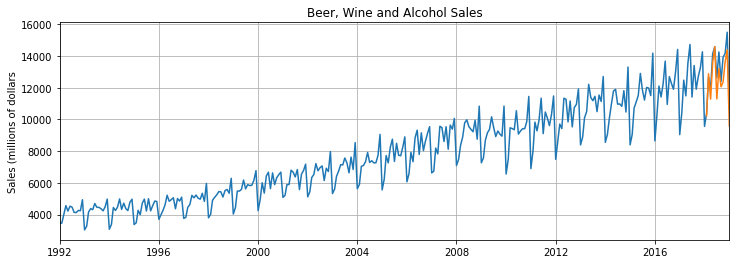

In [0]:
plt.figure(figsize=(12,4))
plt.title('Beer, Wine and Alcohol Sales')
plt.ylabel('Sales (millions of dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions)
plt.show()

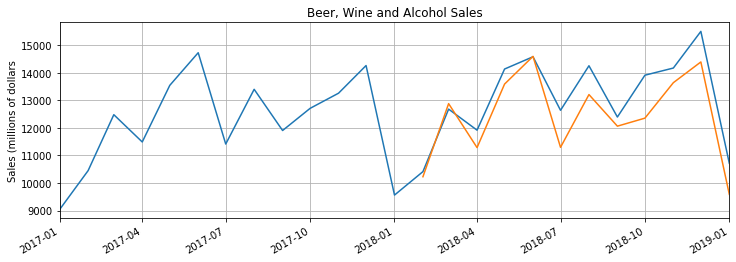

In [0]:
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine and Alcohol Sales')
plt.ylabel('Sales (millions of dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions)
plt.show()

In [0]:
y[-12:]

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

In [0]:
epochs = 100
model.train()
y_norm = scaler.fit_transform(y.reshape(-1,1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm,window_size)
import time
start_time = time.time()
for epoch in range(epochs):
  for seq, y_train in train_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size),
                   torch.zeros(1,1,model.hidden_size))
    y_pred = model(seq)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch} Loss {loss.item()}')
total_time = time.time()-start_time
print(total_time/60)

Epoch 0 Loss 0.0017398897325620055
Epoch 1 Loss 0.0006724813138134778
Epoch 2 Loss 0.00020308169769123197
Epoch 3 Loss 0.000909644179046154
Epoch 4 Loss 0.00028104244847781956
Epoch 5 Loss 8.618609967925295e-07
Epoch 6 Loss 0.0001974703191081062
Epoch 7 Loss 0.0008151228539645672
Epoch 8 Loss 0.0008965741144493222
Epoch 9 Loss 0.0003282268880866468
Epoch 10 Loss 0.0009272728930227458
Epoch 11 Loss 9.702798706712201e-05
Epoch 12 Loss 3.724017005879432e-07
Epoch 13 Loss 2.8963584099983564e-06
Epoch 14 Loss 0.0008662697509862483
Epoch 15 Loss 0.00012870579666923732
Epoch 16 Loss 0.0036257964093238115
Epoch 17 Loss 0.0005904401186853647
Epoch 18 Loss 2.2607453502132557e-05
Epoch 19 Loss 1.2037384067298262e-06
Epoch 20 Loss 0.0003781895211432129
Epoch 21 Loss 4.592625919030979e-05
Epoch 22 Loss 0.00019010216055903584
Epoch 23 Loss 0.0001943840179592371
Epoch 24 Loss 8.02674094302347e-06
Epoch 25 Loss 0.0021555235143750906
Epoch 26 Loss 0.00013322843005880713
Epoch 27 Loss 8.728441571292933e

In [0]:
window_size = 12
future = 12
L = len(y)
preds = y_norm[-window_size:].tolist()
model.eval()
for i in range(future):
  seq = torch.FloatTensor(preds[-window_size:])
  with torch.no_grad():
    model.hidden = (torch.zeros(1,1,model.hidden_size),
                   torch.zeros(1,1,model.hidden_size))
    preds.append(model(seq).item())
    

In [0]:
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1,1))

In [0]:
len(true_predictions)

24

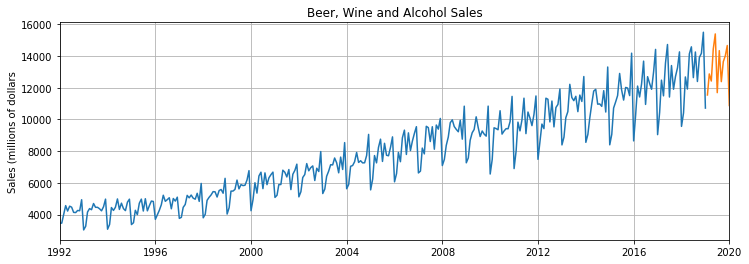

In [0]:
x = np.arange('2019-02-01','2020-02-01',dtype='datetime64[M]').astype('datetime64')
plt.figure(figsize=(12,4))
plt.title('Beer, Wine and Alcohol Sales')
plt.ylabel('Sales (millions of dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions[window_size:])
plt.show()

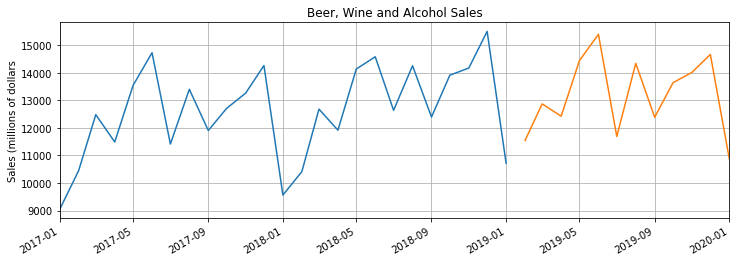

In [0]:
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine and Alcohol Sales')
plt.ylabel('Sales (millions of dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions[-window_size:])
plt.show()

In [0]:
len(true_predictions)

24